In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, date, datetime
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_rel
import numpy as np

In [23]:
# --- read files
csc_imsumo1 = pd.read_excel("data/CSC_COP_TEMP_Insumo1.xlsx", index_col=0, skiprows=1)


In [24]:
csc_imsumo1.head(3)

,VARIABLE_NAME,TRADE_DATE_BEGIN,TRADE_DATE_END,KEY01,KEY02,KEY03,KEY11,KEY12,KEY13,KEY14,VAL001
CALCULATION_RULE_ID,,,,,,,,,,,
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG1,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG2,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG3,GEN,TERM,FOIL,0.0


In [26]:
real_insumo2 = pd.read_excel("data/GReal2_TEMP_DI_Insumo2.xlsx", index_col=0, skiprows=1)
real_insumo2.head(3)

,VARIABLE_NAME,TRADE_DATE_BEGIN,TRADE_DATE_END,KEY01,KEY02,KEY03,KEY11,KEY12,KEY13,KEY14,VAL001
CALCULATION_RULE_ID,,,,,,,,,,,
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,BDJG,G,G,2S8S,GEN,TERM,NaN,1430.88
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,CMXG,G,G,2YQO,GEN,TERM,NaN,0.00
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,DEPG,G,G,2V27,GEN,TERM,NaN,15305.21


In [31]:
genera_real = pd.read_excel("data/GeneracionReal.xlsx", index_col=0, skiprows=0)
genera_real.head(3)

,KEY11,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,VAL009,...,VAL015,VAL016,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024
TRADE_DATE_BEGIN,,,,,,,,,,,,,,,,,,,,,
2023-01-01,2XXR,1.23,1.22,1.17,1.15,1.17,1.15,1.13,1.18,1.27,...,1.38,1.36,1.33,1.33,1.28,1.25,1.23,1.22,1.22,1.22
2023-01-01,AFR1,7254.00,7258.80,7261.20,7261.20,7266.00,7264.80,7263.60,7266.00,7263.60,...,7254.00,7254.00,7256.40,7256.40,7257.60,7257.60,7264.80,7263.60,7264.80,7266.00
2023-01-01,2SDR,8072.00,8097.00,8101.00,8114.00,8111.00,8107.00,8107.00,8101.00,8095.00,...,7880.00,7980.00,8078.00,8024.00,7919.00,7988.00,7897.00,8058.00,9177.00,9798.00


In [66]:
master_plantas = pd.read_excel("data/MasterPlantas.xlsx",  skiprows=0)
master_plantas.head(3)

,KEY01,KEY11,KEY14
0,GECG,2XXR,GAS
1,ADCG,AFR1,AGUA
2,GALG,2SDR,AGUA


In [29]:
precio_bolsa = pd.read_excel("data/PrecioBolsa.xlsx", index_col=0, skiprows=0)
precio_bolsa.head()

,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,VAL009,VAL010,...,VAL015,VAL016,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024
TRADE_DATE_BEGIN,,,,,,,,,,,,,,,,,,,,,
2023-01-01,510.88,510.88,510.88,510.88,510.88,510.88,451.88,451.88,451.88,451.88,...,510.88,510.88,510.88,510.88,518.38,518.38,518.38,518.38,510.88,510.88
2023-01-02,509.33,509.33,509.33,509.33,509.33,509.33,509.33,509.33,510.83,510.83,...,512.33,512.33,512.33,510.83,512.33,512.33,512.33,512.33,510.83,510.83
2023-01-03,509.45,509.45,509.45,509.45,509.45,509.45,509.45,509.45,513.45,513.45,...,561.45,561.45,561.45,541.95,561.45,561.45,541.95,541.95,513.45,509.45
2023-01-04,552.33,552.33,552.33,541.33,541.33,552.33,552.33,552.33,552.33,561.33,...,561.33,561.33,561.33,560.33,562.33,562.33,562.33,561.33,552.33,560.33
2023-01-05,556.31,556.31,556.31,556.31,556.31,556.31,556.31,556.31,556.31,561.81,...,561.81,561.81,561.81,561.81,576.31,576.31,561.81,561.81,561.81,561.81


# parte 1 PUNTO 1

In [37]:
csc_imsumo1.head(3)

,VARIABLE_NAME,TRADE_DATE_BEGIN,TRADE_DATE_END,KEY01,KEY02,KEY03,KEY11,KEY12,KEY13,KEY14,VAL001
CALCULATION_RULE_ID,,,,,,,,,,,
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG1,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG2,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG3,GEN,TERM,FOIL,0.0


In [36]:
real_insumo2.isnull().sum(), real_insumo2.shape
# la key14 no tiene datos 

(VARIABLE_NAME        0
 TRADE_DATE_BEGIN     0
 TRADE_DATE_END       0
 KEY01                0
 KEY02                0
 KEY03                0
 KEY11                0
 KEY12                0
 KEY13                0
 KEY14               78
 VAL001               0
 dtype: int64,
 (78, 11))

In [ ]:
real_insumo2.head(3)

In [211]:
real_insumo = pd.concat([csc_imsumo1, real_insumo2])
real_insumo

,VARIABLE_NAME,TRADE_DATE_BEGIN,TRADE_DATE_END,KEY01,KEY02,KEY03,KEY11,KEY12,KEY13,KEY14,VAL001
CALCULATION_RULE_ID,,,,,,,,,,,
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG1,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG2,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG3,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,ZPA2,GEN,TERM,CARB,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,ZPA3,GEN,TERM,CARB,0.0
...,...,...,...,...,...,...,...,...,...,...,...
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,TYPG,G,G,TYP2,GEN,TERM,NaN,0.0
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,TYPG,G,G,TYP3,GEN,TERM,NaN,0.0
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,TYPG,G,G,TYP4,GEN,TERM,NaN,0.0


In [226]:
real_insumo[(real_insumo["KEY13"] == "TERM") & (real_insumo["KEY12"] == "GEN")]


,VARIABLE_NAME,TRADE_DATE_BEGIN,TRADE_DATE_END,KEY01,KEY02,KEY03,KEY11,KEY12,KEY13,KEY14,VAL001
CALCULATION_RULE_ID,,,,,,,,,,,
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG1,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG2,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,CTG3,GEN,TERM,FOIL,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,ZPA2,GEN,TERM,CARB,0.0
360130,CSC_COP_TEMP,2021-04-01,2021-04-01,ENDG,G,G,ZPA3,GEN,TERM,CARB,0.0
...,...,...,...,...,...,...,...,...,...,...,...
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,TYPG,G,G,TYP2,GEN,TERM,NaN,0.0
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,TYPG,G,G,TYP3,GEN,TERM,NaN,0.0
360092,GReal2_TEMP_DI,2021-04-01,2021-04-01,TYPG,G,G,TYP4,GEN,TERM,NaN,0.0


# parte 2 PUNTO 1

In [38]:
genera_real.head(3)

,KEY11,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,VAL009,...,VAL015,VAL016,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024
TRADE_DATE_BEGIN,,,,,,,,,,,,,,,,,,,,,
2023-01-01,2XXR,1.23,1.22,1.17,1.15,1.17,1.15,1.13,1.18,1.27,...,1.38,1.36,1.33,1.33,1.28,1.25,1.23,1.22,1.22,1.22
2023-01-01,AFR1,7254.00,7258.80,7261.20,7261.20,7266.00,7264.80,7263.60,7266.00,7263.60,...,7254.00,7254.00,7256.40,7256.40,7257.60,7257.60,7264.80,7263.60,7264.80,7266.00
2023-01-01,2SDR,8072.00,8097.00,8101.00,8114.00,8111.00,8107.00,8107.00,8101.00,8095.00,...,7880.00,7980.00,8078.00,8024.00,7919.00,7988.00,7897.00,8058.00,9177.00,9798.00


In [40]:
genera_real.isnull().sum()

KEY11     0
VAL001    2
VAL002    0
VAL003    0
VAL004    0
VAL005    0
VAL006    1
VAL007    0
VAL008    0
VAL009    0
VAL010    0
VAL011    0
VAL012    0
VAL013    2
VAL014    1
VAL015    0
VAL016    1
VAL017    0
VAL018    0
VAL019    0
VAL020    4
VAL021    0
VAL022    0
VAL023    0
VAL024    0
dtype: int64

In [42]:
# fill null values with mean for each company
genera_real.fillna(genera_real.groupby(by="KEY11")
                                .transform("mean"), 
                                inplace=True)

In [43]:
genera_real.isnull().sum()

KEY11     0
VAL001    0
VAL002    0
VAL003    0
VAL004    0
VAL005    0
VAL006    0
VAL007    0
VAL008    0
VAL009    0
VAL010    0
VAL011    0
VAL012    0
VAL013    0
VAL014    0
VAL015    0
VAL016    0
VAL017    0
VAL018    0
VAL019    0
VAL020    0
VAL021    0
VAL022    0
VAL023    0
VAL024    0
dtype: int64

In [44]:
# check index type
genera_real.index

DatetimeIndex(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
               '2023-01-01', '2023-01-01',
               ...
               '2023-03-31', '2023-03-31', '2023-03-31', '2023-03-31',
               '2023-03-31', '2023-03-31', '2023-03-31', '2023-03-31',
               '2023-03-31', '2023-03-31'],
              dtype='datetime64[ns]', name='TRADE_DATE_BEGIN', length=19200, freq=None)

In [49]:
# genera_real.index = genera_real.reset_index().TRADE_DATE_BEGIN.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
genera_real.reset_index(inplace=True)
genera_real['TRADE_MONTH_BEGIN'] =  genera_real.TRADE_DATE_BEGIN.dt.strftime('%Y-%m')
genera_real.head(3)

,TRADE_DATE_BEGIN,KEY11,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,...,VAL016,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024,TRADE_MONTH_BEGIN
0,2023-01-01,2XXR,1.23,1.22,1.17,1.15,1.17,1.15,1.13,1.18,...,1.36,1.33,1.33,1.28,1.25,1.23,1.22,1.22,1.22,2023-01
1,2023-01-01,AFR1,7254.00,7258.80,7261.20,7261.20,7266.00,7264.80,7263.60,7266.00,...,7254.00,7256.40,7256.40,7257.60,7257.60,7264.80,7263.60,7264.80,7266.00,2023-01
2,2023-01-01,2SDR,8072.00,8097.00,8101.00,8114.00,8111.00,8107.00,8107.00,8101.00,...,7980.00,8078.00,8024.00,7919.00,7988.00,7897.00,8058.00,9177.00,9798.00,2023-01


In [55]:
# transpose matrix to sum over the hours
# only take the GENERACION values
# transpose it again and save it in a new column 
genera_real['GEN_DAILY'] = genera_real.T.iloc[2:-1].sum().T
genera_real.head()


,TRADE_DATE_BEGIN,KEY11,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,...,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024,TRADE_MONTH_BEGIN,GEN_DAILY
0,2023-01-01,2XXR,1.23,1.22,1.17,1.15,1.17,1.15,1.13,1.18,...,1.33,1.33,1.28,1.25,1.23,1.22,1.22,1.22,2023-01,30.39
1,2023-01-01,AFR1,7254.00,7258.80,7261.20,7261.20,7266.00,7264.80,7263.60,7266.00,...,7256.40,7256.40,7257.60,7257.60,7264.80,7263.60,7264.80,7266.00,2023-01,174238.8
2,2023-01-01,2SDR,8072.00,8097.00,8101.00,8114.00,8111.00,8107.00,8107.00,8101.00,...,8078.00,8024.00,7919.00,7988.00,7897.00,8058.00,9177.00,9798.00,2023-01,195514.0
3,2023-01-01,ALTG,10108.80,10112.40,10108.80,10112.40,10108.80,6728.40,10112.40,10116.00,...,10112.40,10112.40,10112.40,10108.80,10112.40,10108.80,10108.80,10112.40,2023-01,239256.0
4,2023-01-01,AMA1,10289.18,10289.28,3464.31,0.00,5729.39,10050.51,10053.81,10040.77,...,8881.58,8888.96,8884.47,3094.96,3634.50,10093.02,10110.60,10120.24,2023-01,191067.06


In [67]:
master_plantas.head(3)

,KEY01,KEY11,KEY14
0,GECG,2XXR,GAS
1,ADCG,AFR1,AGUA
2,GALG,2SDR,AGUA


In [83]:
genera_total_recurso = genera_real[["KEY11", "GEN_DAILY", "TRADE_MONTH_BEGIN"]].groupby(by=["TRADE_MONTH_BEGIN", "KEY11"]).mean()
genera_total_recurso.reset_index(inplace=True)
genera_total_recurso.columns = ["TRADE_MONTH_BEGIN", "KEY11", "GEN_MONTH"]
genera_total_recurso.head()

,TRADE_MONTH_BEGIN,KEY11,GEN_MONTH
0,2023-01,2QBW,364235.761290
1,2023-01,2QEK,771739.242800
2,2023-01,2QRL,15714.396774
3,2023-01,2QV2,270162.043226
4,2023-01,2R22,399939.289643


In [87]:
total_month = pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).mean()
total_month.head()

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/361785252.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_month = pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).mean()


GEN_MONTH
TRADE_MONTH_BEGIN KEY14               
2023-01           ACPM    6.928712e+05
                  AGUA    1.269910e+06
                  BAGAZO  1.632792e+05
                  BIOGAS  4.024222e+03
                  CARBON  1.187192e+06

In [170]:
# --- Plot min, mean, max
# concat over month
generacion_min_max = pd.concat([genera_total_recurso[["TRADE_MONTH_BEGIN", "GEN_MONTH"]].groupby(by="TRADE_MONTH_BEGIN").min(), 
                              genera_total_recurso[["TRADE_MONTH_BEGIN", "GEN_MONTH"]].groupby(by="TRADE_MONTH_BEGIN").mean(), 
                              genera_total_recurso[["TRADE_MONTH_BEGIN", "GEN_MONTH"]].groupby(by="TRADE_MONTH_BEGIN").max(),
                              genera_total_recurso[["TRADE_MONTH_BEGIN", "GEN_MONTH"]].groupby(by="TRADE_MONTH_BEGIN").std()
                              ], 
                              axis=1)
generacion_min_max.columns = ["min", "mean", "max", "std"]
generacion_min_max.head()

,min,mean,max,std
TRADE_MONTH_BEGIN,,,,
2023-01,0.12,959117.395930,1.886846e+07,2.564422e+06
2023-02,0.84,984139.715604,2.571849e+07,2.822524e+06
2023-03,0.00,918838.004939,2.080975e+07,2.610517e+06


In [103]:
pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).std()


/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/3945928240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).std()


GEN_MONTH
TRADE_MONTH_BEGIN KEY14                    
2023-01           ACPM         1.044136e+06
                  AGUA         3.218659e+06
                  BAGAZO       1.599053e+05
                  BIOGAS       2.198962e+03
                  CARBON       1.284512e+06
                  COMBUSTOLEO  1.883858e+05
                  GAS          1.070918e+06
                  GAS NI                NaN
                  JET-A1                NaN
                  RAD SOLAR    8.231129e+04
                  VIENTO       9.192548e+04
2023-02           ACPM         1.007387e+06
                  AGUA         3.550410e+06
                  BAGAZO       1.883971e+05
                  BIOGAS       3.456688e+03
                  CARBON       1.538382e+06
                  COMBUSTOLEO  3.014617e+05
                  GAS          1.535778e+06
                  GAS NI       5.493469e+06
                  RAD SOLAR    8.783512e+04
                  VIENTO       1.077122e+05
2023-03           ACPM         8.538367e+05
                  AGUA         3.291464e+06
                  BAGAZO       1.572564e+05
                  BIOGAS       4.932956e+03
                  CARBON       1.465394e+06
                  COMBUSTOLEO  1.302500e+05
                  GAS          1.198635e+06
                  GAS NI       4.090236e+06
                  JET-A1                NaN
                  RAD SOLAR    7.543588e+04
                  VIENTO       1.010223e+05

In [101]:
# --- Plot min, mean, max
# concat over month
generacion_min_max = pd.concat([pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).sum(),
                                pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).min(),
                                pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).mean(),
                                pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).max()
                                ], 
                              axis=1)

#generacion_min_max.columns = ["sum", "min", "mean", "max"]
generacion_min_max[["GEN_MONTH",	"GEN_MONTH"	,	"GEN_MONTH"	,	"GEN_MONTH"	]].head()


/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/891810972.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  generacion_min_max = pd.concat([pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).sum(),
/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/891810972.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.merge(genera_total_recurso, master_plantas, on='KEY11', how='inner').groupby(["TRADE_MONTH_BEGIN", "KEY14"]).mean(),


GEN_MONTH  GEN_MONTH     GEN_MONTH     GEN_MONTH  \
TRADE_MONTH_BEGIN KEY14                                                         
2023-01           ACPM    4.157227e+06     515.84  6.928712e+05  2.594547e+06   
                  AGUA    1.879467e+08       0.12  1.269910e+06  1.886846e+07   
                  BAGAZO  2.285909e+06    2361.92  1.632792e+05  4.672600e+05   
                  BIOGAS  1.609689e+04    2352.45  4.024222e+03  7.053342e+03   
                  CARBON  2.136945e+07       0.14  1.187192e+06  4.240112e+06   

                             GEN_MONTH  GEN_MONTH     GEN_MONTH     GEN_MONTH  \
TRADE_MONTH_BEGIN KEY14                                                         
2023-01           ACPM    4.157227e+06     515.84  6.928712e+05  2.594547e+06   
                  AGUA    1.879467e+08       0.12  1.269910e+06  1.886846e+07   
                  BAGAZO  2.285909e+06    2361.92  1.632792e+05  4.672600e+05   
                  BIOGAS  1.609689e+04    2352.45  4.024222e+03  7.053342e+03   
                  CARBON  2.136945e+07       0.14  1.187192e+06  4.240112e+06   

                             GEN_MONTH  GEN_MONTH     GEN_MONTH     GEN_MONTH  \
TRADE_MONTH_BEGIN KEY14                                                         
2023-01           ACPM    4.157227e+06     515.84  6.928712e+05  2.594547e+06   
                  AGUA    1.879467e+08       0.12  1.269910e+06  1.886846e+07   
                  BAGAZO  2.285909e+06    2361.92  1.632792e+05  4.672600e+05   
                  BIOGAS  1.609689e+04    2352.45  4.024222e+03  7.053342e+03   
                  CARBON  2.136945e+07       0.14  1.187192e+06  4.240112e+06   

                             GEN_MONTH  GEN_MONTH     GEN_MONTH     GEN_MONTH  
TRADE_MONTH_BEGIN KEY14                                                        
2023-01           ACPM    4.157227e+06     515.84  6.928712e+05  2.594547e+06  
                  AGUA    1.879467e+08       0.12  1.269910e+06  1.886846e+07  
                  BAGAZO  2.285909e+06    2361.92  1.632792e+05  4.672600e+05  
                  BIOGAS  1.609689e+04    2352.45  4.024222e+03  7.053342e+03  
                  CARBON  2.136945e+07       0.14  1.187192e+06  4.240112e+06

In [64]:
genera_diario_recurso = genera_real[["KEY11", "GEN_DAILY", "TRADE_MONTH_BEGIN"]].groupby(by=["TRADE_MONTH_BEGIN", "KEY11"]).mean()
#genera_diario_recurso.columns = ["GEN_MONTH"]
genera_diario_recurso.head()
genera_real['GEN_DAILY_MEAN'] = genera_diario_recurso.T.iloc[2:-1].mean().T
genera_real.head()

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/1804748264.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genera_diario_recurso = genera_real[["KEY11", "GEN_DAILY", "TRADE_MONTH_BEGIN"]].groupby(by=["KEY11"]).mean()


,GEN_DAILY
KEY11,
2QBW,368567.557444
2QEK,719180.709184
2QRL,15203.725667
2QV2,235680.093409
2R22,308535.619577


# Parte 2 PUNTO 2

In [135]:
generacion_por_agente = pd.merge(genera_real[["TRADE_DATE_BEGIN", "KEY11", "GEN_DAILY"]], 
                                    master_plantas[(master_plantas.KEY14 == "RAD SOLAR") | (master_plantas.KEY14 == "VIENTO")], 
                                    on='KEY11', 
                                    how='inner')
generacion_por_agente = generacion_por_agente[["TRADE_DATE_BEGIN", "GEN_DAILY", "KEY01"]]
generacion_por_agente["PORCENTAJE"] = generacion_por_agente["GEN_DAILY"].values / generacion_por_agente.groupby("KEY01").transform("sum").values.ravel()
generacion_por_agente.columns = ["TRADE_DATE_BEGIN", "GEN_DAILY", "CODIGO_SIC", "PORCENTAJE"]
generacion_por_agente.head()

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/3097404826.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  generacion_por_agente["PORCENTAJE"] = generacion_por_agente["GEN_DAILY"].values / generacion_por_agente.groupby("KEY01").transform("sum").values.ravel()


,TRADE_DATE_BEGIN,GEN_DAILY,CODIGO_SIC,PORCENTAJE
0,2023-01-01,8064.32,EPSG,0.000112
1,2023-01-02,7546.88,EPSG,0.000105
2,2023-01-03,5806.46,EPSG,0.000081
3,2023-01-04,7617.28,EPSG,0.000106
4,2023-01-05,7617.28,EPSG,0.000106


In [136]:
generacion_por_agente.to_csv("generacion_por_agente.csv")

In [155]:
generacion_por_agente.groupby("CODIGO_SIC").sum()["GEN_DAILY"]

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/2480333546.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  generacion_por_agente.groupby("CODIGO_SIC").sum()["GEN_DAILY"]


CODIGO_SIC
AAGG    13352012.50
DEPG       32355.00
EEPG     2007983.88
ENDG    41448507.60
ENUG     3359308.16
EPMG    12000193.28
EPSG    71790763.93
ERRG      240854.70
FERG       45283.68
GNCG    37269661.65
GNYG     4618882.95
ISGG    74973200.97
SPRG     1541379.00
TERG     1618019.73
Name: GEN_DAILY, dtype: float64

In [154]:
# maxima demanda en 2022
max_porcentaje = generacion_por_agente.groupby("CODIGO_SIC").sum()["GEN_DAILY"].max()
max_porcentaje

/var/folders/8h/p03rjs6x5378pln2gkncg9fc0000gn/T/ipykernel_4560/3089236901.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  max_porcentaje = generacion_por_agente.groupby("CODIGO_SIC").sum()["GEN_DAILY"].max()


74973200.97000006

In [168]:
generacion_ISGG = generacion_por_agente[generacion_por_agente["CODIGO_SIC"] == "ISGG"]
generacion_ISGG.set_index("TRADE_DATE_BEGIN", inplace=True)
generacion_ISGG.head()


,GEN_DAILY,CODIGO_SIC,PORCENTAJE
TRADE_DATE_BEGIN,,,
2023-01-01,171663.6,ISGG,0.00229
2023-01-02,131965.69,ISGG,0.00176
2023-01-03,132442.15,ISGG,0.001767
2023-01-04,134882.53,ISGG,0.001799
2023-01-05,166849.44,ISGG,0.002225


<Axes: xlabel='TRADE_DATE_BEGIN'>

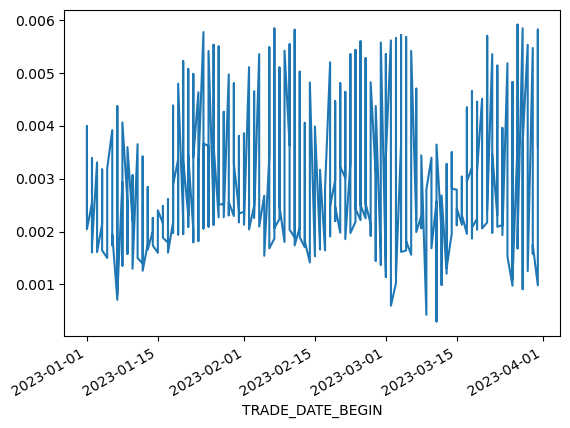

In [169]:
generacion_ISGG.PORCENTAJE.plot()

In [203]:
# OUTLIERS: Calculate the Z-score for each value in the dataframe
z_scores = np.abs((generacion_ISGG.PORCENTAJE - generacion_ISGG.PORCENTAJE.mean()) / generacion_ISGG.PORCENTAJE.std())


In [202]:
# Identify values with a Z-score greater than the threshold
generacion_ISGG.PORCENTAJE[z_scores > 2.3]

TRADE_DATE_BEGIN
2023-01-24    0.005773
2023-02-07    0.005839
2023-02-11    0.005815
2023-03-27    0.005912
2023-03-28    0.005844
2023-03-31    0.005819
Name: PORCENTAJE, dtype: object

# Parte 2 PUNTO 3

In [173]:
precio_bolsa['DIARIA'] = precio_bolsa.T.iloc[1::].sum().T
precio_bolsa.head()

,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,VAL009,VAL010,...,VAL016,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024,DIARIA
TRADE_DATE_BEGIN,,,,,,,,,,,,,,,,,,,,,
2023-01-01,510.88,510.88,510.88,510.88,510.88,510.88,451.88,451.88,451.88,451.88,...,510.88,510.88,510.88,518.38,518.38,518.38,518.38,510.88,510.88,11485.24
2023-01-02,509.33,509.33,509.33,509.33,509.33,509.33,509.33,509.33,510.83,510.83,...,512.33,512.33,510.83,512.33,512.33,512.33,512.33,510.83,510.83,11752.09
2023-01-03,509.45,509.45,509.45,509.45,509.45,509.45,509.45,509.45,513.45,513.45,...,561.45,561.45,541.95,561.45,561.45,541.95,541.95,513.45,509.45,12236.35
2023-01-04,552.33,552.33,552.33,541.33,541.33,552.33,552.33,552.33,552.33,561.33,...,561.33,561.33,560.33,562.33,562.33,562.33,561.33,552.33,560.33,12807.59
2023-01-05,556.31,556.31,556.31,556.31,556.31,556.31,556.31,556.31,556.31,561.81,...,561.81,561.81,561.81,576.31,576.31,561.81,561.81,561.81,561.81,12906.63


In [175]:
precio_bolsa.reset_index(inplace=True)
precio_bolsa['TRADE_MONTH_BEGIN'] =  precio_bolsa.TRADE_DATE_BEGIN.dt.strftime('%Y-%m')
precio_bolsa.head()

,index,TRADE_DATE_BEGIN,VAL001,VAL002,VAL003,VAL004,VAL005,VAL006,VAL007,VAL008,...,VAL017,VAL018,VAL019,VAL020,VAL021,VAL022,VAL023,VAL024,DIARIA,TRADE_MONTH_BEGIN
0,0,2023-01-01,510.88,510.88,510.88,510.88,510.88,510.88,451.88,451.88,...,510.88,510.88,518.38,518.38,518.38,518.38,510.88,510.88,11485.24,2023-01
1,1,2023-01-02,509.33,509.33,509.33,509.33,509.33,509.33,509.33,509.33,...,512.33,510.83,512.33,512.33,512.33,512.33,510.83,510.83,11752.09,2023-01
2,2,2023-01-03,509.45,509.45,509.45,509.45,509.45,509.45,509.45,509.45,...,561.45,541.95,561.45,561.45,541.95,541.95,513.45,509.45,12236.35,2023-01
3,3,2023-01-04,552.33,552.33,552.33,541.33,541.33,552.33,552.33,552.33,...,561.33,560.33,562.33,562.33,562.33,561.33,552.33,560.33,12807.59,2023-01
4,4,2023-01-05,556.31,556.31,556.31,556.31,556.31,556.31,556.31,556.31,...,561.81,561.81,576.31,576.31,561.81,561.81,561.81,561.81,12906.63,2023-01


In [185]:
diario_bolsa = precio_bolsa[["DIARIA", "TRADE_MONTH_BEGIN"]].groupby("TRADE_MONTH_BEGIN").sum()
diario_bolsa

,DIARIA
TRADE_MONTH_BEGIN,
2023-01,266487.97
2023-02,341091.04
2023-03,209322.05


In [187]:
diario_gen = genera_real[["GEN_DAILY", "TRADE_MONTH_BEGIN"]].groupby("TRADE_MONTH_BEGIN").sum()
diario_gen

,GEN_DAILY
TRADE_MONTH_BEGIN,
2023-01,6.693591e+09
2023-02,6.199117e+09
2023-03,6.645155e+09


In [192]:
ventas_bolsa_nacional = pd.DataFrame(diario_gen.GEN_DAILY * diario_bolsa.DIARIA * 0.2)
ventas_bolsa_nacional

,0
TRADE_MONTH_BEGIN,
2023-01,3.567523e+14
2023-02,4.228927e+14
2023-03,2.781955e+14


In [193]:
ventas_bolsa_nacional.to_csv("ventas_bolsa_nacional.xlsx")